- Less training data (1 year)
- Why is RF with stations so bad?
- Why is NN worse than LR?

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
PATH = Path('/local/S.Rasp/ML-Workshop-Data')

## Check out the data

In [3]:
%time df_train = pd.read_csv(PATH / 'pp_train.csv', index_col=0)

CPU times: user 4.26 s, sys: 384 ms, total: 4.65 s
Wall time: 4.21 s


In [4]:
df_test = pd.read_csv(PATH / 'pp_test.csv', index_col=0)

In [5]:
df_train.head()

,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,1.2,2011-01-01,3,-0.022290,107.439460,202.0,50.7827,6.0941,4.760467,-4.907918,...,101379.51,98.056010,634981.400,39645.008,2.208909,0.755302,2433034.8,-3513225.0,273.57892,374.63348
1,1.6,2011-01-01,44,2.086415,19.397774,44.0,52.9335,8.2370,14.442179,-10.303844,...,101709.04,98.741800,1592483.900,370638.600,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.60350
2,-6.3,2011-01-01,71,-6.609096,604.885000,759.0,48.2156,8.9784,0.254339,-6.281372,...,94432.85,91.602340,-1416809.800,-239365.980,-0.394419,-0.950840,4320586.0,-4435227.5,265.47473,437.02300
3,-3.0,2011-01-01,73,-5.071753,461.441800,340.0,48.6159,13.0506,2.489346,-10.044441,...,97368.55,91.139370,48696.496,-570603.400,1.923471,0.336067,5658946.5,-6691302.0,267.49640,366.52255
4,0.5,2011-01-01,78,1.743580,47.632523,65.0,52.4853,7.9126,11.600490,-9.078665,...,101419.82,99.178986,1435826.900,616228.750,4.472726,0.673820,2416039.5,-1872194.9,274.56433,263.73572


In [163]:
df_train.tail()

,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
980554,3.0,2015-12-31,13713,1.842429,257.02356,380.0,51.0899,7.6290,8.021941,9.215481,...,98368.79,97.528730,3240795.200,-1365392.40,-3.575616,5.123034,5258117.5,-9587814.0,272.61206,377.49332
980556,1.1,2015-12-31,13777,0.349665,175.75687,110.0,52.2467,10.9592,4.605148,7.224523,...,100065.46,33.931360,461620.000,-937924.75,-2.375989,3.232810,3969810.2,-8044923.5,268.09543,360.12930
980558,7.5,2015-12-31,15000,5.528891,107.43946,231.0,50.7983,6.0244,11.228638,15.585323,...,100676.50,99.580050,5782064.500,-1611508.80,-0.390423,4.154122,5497532.0,-11673069.0,275.51572,369.66882
980559,0.4,2015-12-31,15207,0.615183,279.01727,317.0,51.2835,9.3590,5.748416,6.160424,...,98979.74,75.234440,3009928.200,-887333.80,-1.401080,4.235398,5381488.5,-11127237.0,269.41890,374.02716
980560,-0.4,2015-12-31,15444,-2.074630,532.69617,593.0,48.4418,9.9216,4.586841,1.927479,...,95462.08,79.705086,27329.305,-473234.53,-1.286085,0.675678,7741430.0,-9189286.0,270.56137,360.25525


In [6]:
df_test.head()

,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,2016-01-01,44,4.001778,19.397774,44.0,52.9335,8.2370,10.133337,10.131109,5481.7905,...,101887.90,24.705662,5775243.0,-1288526.40,1.341565,3.249270,3298437.0,-10775857.0,275.95218,375.07983
1,2016-01-01,71,0.933522,604.885000,759.0,48.2156,8.9784,19.385162,2.524293,5588.5977,...,94560.06,78.469610,1349700.0,-227886.42,1.287638,0.519051,5560022.0,-6258117.0,273.41055,431.60340
2,2016-01-01,73,-0.188741,461.441800,340.0,48.6159,13.0506,9.542810,1.230813,5593.8506,...,97636.46,98.030160,2487178.5,-1343765.20,0.499829,0.657743,6949536.0,-9512730.0,271.99976,361.13397
3,2016-01-01,78,3.953006,47.632523,65.0,52.4853,7.9126,10.977405,9.408463,5488.8840,...,101561.08,20.500540,5856912.0,-1207934.40,1.439010,3.148981,3502853.8,-10732310.0,275.77515,245.30484
4,2016-01-01,91,1.293405,348.869900,300.0,50.7446,9.3450,14.657755,8.755051,5538.4110,...,97486.05,83.718890,1802866.2,-874888.00,0.996717,1.799243,2939294.0,-6318281.0,274.60370,378.45820


In [7]:
df_train.apply(pd.Series.isna).mean()

t2m_obs             0.073126
time                0.000000
station             0.000000
t2m_fc_mean         0.000000
orog                0.000000
station_alt         0.000000
station_lat         0.000000
station_lon         0.000000
u_pl500_fc_mean     0.000000
v_pl500_fc_mean     0.000000
gh_pl500_fc_mean    0.000000
u_pl850_fc_mean     0.000000
v_pl850_fc_mean     0.000000
q_pl850_fc_mean     0.000000
cape_fc_mean        0.000000
sp_fc_mean          0.000000
tcc_fc_mean         0.000000
sshf_fc_mean        0.000000
slhf_fc_mean        0.000000
u10_fc_mean         0.000000
v10_fc_mean         0.000000
ssr_fc_mean         0.000000
str_fc_mean         0.000000
d2m_fc_mean         0.000000
sm_fc_mean          0.095825
dtype: float64

In [8]:
df_train.dropna(subset=['t2m_obs'], inplace=True)

In [9]:
df_train['sm_fc_mean'].replace(np.nan, df_train.sm_fc_mean.mean(), inplace=True)

In [10]:
df_test['sm_fc_mean'].replace(np.nan, df_train.sm_fc_mean.mean(), inplace=True)

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


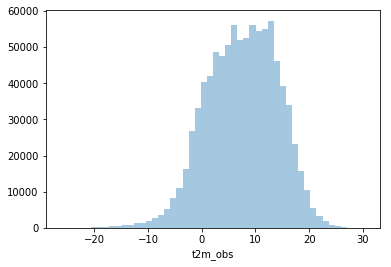

In [11]:
sns.distplot(df_train['t2m_obs'], kde=False)

## Split and Normalize the data

In [145]:
def split_and_norm(df_train, drop_train=[], split_date='2015-01-01', do_norm=True):
    X = df_train.drop(['t2m_obs', 'time'] + drop_train, 1)
    y = df_train['t2m_obs']
    
    if do_norm:
        for cat in X.columns:
            if X[cat].dtype == 'float': 
                X[cat] = (X[cat] - X[cat].mean()) / X[cat].std()
    
    X_train = X[df_train.time <  split_date]
    X_valid = X[df_train.time >= split_date]
    y_train = y[df_train.time <  split_date]
    y_valid = y[df_train.time >= split_date]
    return X_train, y_train, X_valid, y_valid

In [150]:
X_train, y_train, X_valid, y_valid = split_and_norm(
    df_train, drop_train=['station'])

In [151]:
X_train.shape, X_valid.shape

((728008, 22), (180849, 22))

## Linear regression

In [71]:
def mse(y_true, y_pred): return ((y_true - y_pred)**2).mean()

In [72]:
mse(y_valid, df_train.t2m_fc_mean[df_train.time >= '2015-01-01'])

4.135858792431942

In [73]:
lin_reg = LinearRegression()

In [74]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
#R2
lin_reg.score(X_valid, y_valid)

0.9187372901848856

In [78]:
def val_mse(m):
    return mse(m.predict(X_valid), y_valid)

In [79]:
val_mse(lin_reg)

3.2422963614329743

## Decision tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import display
import IPython, graphviz, re

In [53]:
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

In [66]:
dec_tree = DecisionTreeRegressor(max_depth=3)

In [67]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

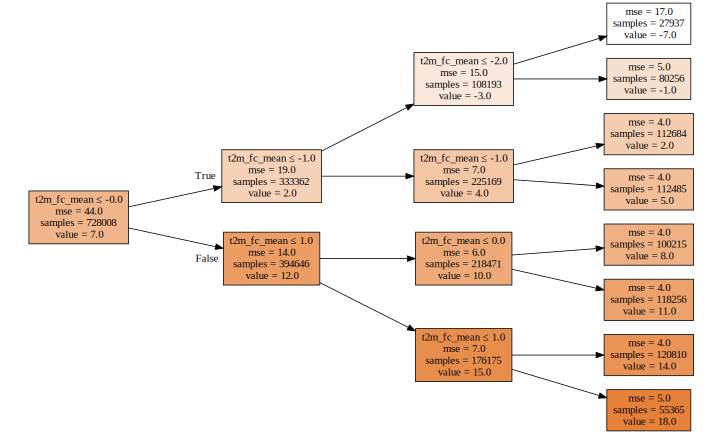

In [68]:
draw_tree(dec_tree, df_train.drop(['t2m_obs', 'time', 'station'], 1))

In [70]:
dec_tree.score(X_valid, y_valid), val_mse(dec_tree)

0.8742815625139746

In [80]:
val_mse(dec_tree)

5.016032979374179

In [81]:
dec_tree = DecisionTreeRegressor()

In [82]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [91]:
def print_scores(m):
    print('Train R2 = ', m.score(X_train, y_train), 
          'Valid R2 = ', m.score(X_valid, y_valid), 'Valid MSE = ', val_mse(m))

In [83]:
dec_tree.score(X_train, y_train), dec_tree.score(X_valid, y_valid), val_mse(dec_tree)

(0.8422688075251983, 6.293308118928114)

## Random forests

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [90]:
%time rf.fit(X_train, y_train)

CPU times: user 4min 24s, sys: 448 ms, total: 4min 25s
Wall time: 29.2 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
print_scores(rf)

Train R2 =  0.992372550428251 Valid R2 =  0.917387638494944 Valid MSE =  3.296146039513547


In [96]:
rf = RandomForestRegressor(n_estimators=10, n_jobs=-1, min_samples_leaf=10)

In [97]:
%time rf.fit(X_train, y_train)

CPU times: user 3min 35s, sys: 72 ms, total: 3min 35s
Wall time: 22.1 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [98]:
print_scores(rf)

Train R2 =  0.9744102578637028 Valid R2 =  0.9206789290561015 Valid MSE =  3.164827019570321


In [99]:
rf = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=10)

In [100]:
%time rf.fit(X_train, y_train)

CPU times: user 20min 54s, sys: 688 ms, total: 20min 55s
Wall time: 1min 5s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [101]:
print_scores(rf)

Train R2 =  0.9759035535174916 Valid R2 =  0.923940592714597 Valid MSE =  3.0346900817765796


### Adding station information

In [156]:
X_train, y_train, X_valid, y_valid = split_and_norm(
    df_train)

In [189]:
rf = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=100)

In [190]:
%time rf.fit(X_train, y_train)

CPU times: user 17min 23s, sys: 712 ms, total: 17min 24s
Wall time: 53.9 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [191]:
print_scores(rf)

Train R2 =  0.9476200271523911 Valid R2 =  0.9203890855684441 Valid MSE =  3.176391468843023


### Feature importance

In [192]:
rf.feature_importances_

array([1.70038964e-04, 9.68016978e-01, 1.00280650e-03, 5.11335114e-03,
       3.23670536e-03, 9.42989429e-04, 6.30098798e-04, 6.53201219e-04,
       1.00970758e-03, 1.00211689e-03, 7.20027864e-04, 1.71873593e-03,
       6.39720282e-04, 2.97109665e-04, 1.22447285e-03, 9.54803482e-04,
       5.17068361e-04, 8.49792232e-04, 7.29072403e-04, 6.79958939e-04,
       6.26087291e-04, 8.99368558e-03, 2.71471498e-04])

In [193]:
fi_df = pd.DataFrame(
    data={'Feature': X_train.columns, 'Feature importance': rf.feature_importances_}, 
    columns = ['Feature', 'Feature importance']
)

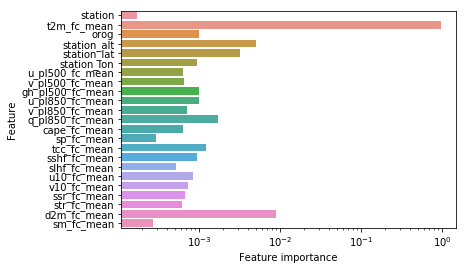

In [194]:
sns.barplot(data=fi_df, x='Feature importance', y='Feature')
plt.xscale('log')

## Neural networks

In [204]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD, Adam

In [196]:
X_train, y_train, X_valid, y_valid = split_and_norm(
    df_train, drop_train=['station'])

In [197]:
X_train.shape, y_train.shape

((728008, 22), (728008,))

In [213]:
nn = Sequential([Dense(1, input_shape=(22,), activation='linear')])

In [214]:
nn.compile(SGD(1e-3), 'mse')

In [215]:
h = nn.fit(X_train, y_train, 10_000, epochs=100, validation_data=(X_valid, y_valid),
           verbose=1)

Train on 728008 samples, validate on 180849 samples
Epoch 1/100
728008/728008 [==============================] - 1s 1us/step - loss: 70.5051 - val_loss: 59.0549
Epoch 2/100
728008/728008 [==============================] - 1s 1us/step - loss: 47.1148 - val_loss: 42.2687
Epoch 3/100
728008/728008 [==============================] - 1s 1us/step - loss: 34.5186 - val_loss: 31.9371
Epoch 4/100
728008/728008 [==============================] - 1s 1us/step - loss: 26.3145 - val_loss: 24.8189
Epoch 5/100
728008/728008 [==============================] - 1s 1us/step - loss: 20.5185 - val_loss: 19.6722
Epoch 6/100
728008/728008 [==============================] - 1s 1us/step - loss: 16.2895 - val_loss: 15.8688
Epoch 7/100
728008/728008 [==============================] - 1s 1us/step - loss: 13.1609 - val_loss: 13.0251
Epoch 8/100
728008/728008 [==============================] - 1s 1us/step - loss: 10.8304 - val_loss: 10.8837
Epoch 9/100
728008/728008 [==============================] - 1s 1us/step - l

In [216]:
nn.optimizer.lr=1e-4

In [217]:
nn.fit(X_train, y_train, 10_000, epochs=20, validation_data=(X_valid, y_valid),
           verbose=1)

Train on 728008 samples, validate on 180849 samples
Epoch 1/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1742 - val_loss: 3.4830
Epoch 2/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1724 - val_loss: 3.4813
Epoch 3/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1706 - val_loss: 3.4796
Epoch 4/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1688 - val_loss: 3.4779
Epoch 5/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1670 - val_loss: 3.4764
Epoch 6/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1653 - val_loss: 3.4748
Epoch 7/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1636 - val_loss: 3.4732
Epoch 8/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1619 - val_loss: 3.4717
Epoch 9/20
728008/728008 [==============================] - 1s 1us/step - loss: 3.1603 - val_loss: 3

In [212]:
nn.evaluate(X_valid, y_valid)

180849/180849 [==============================] - 8s 42us/step


3.4795644690935355

In [218]:
nn = Sequential([
    Dense(256, input_shape=(22,), activation='relu'),
    Dense(1, activation='linear')
])

In [219]:
nn.compile(Adam(1e-3), 'mse')

In [220]:
nn.fit(X_train, y_train, 1024, epochs=20, validation_data=(X_valid, y_valid),
       verbose=1)

Train on 728008 samples, validate on 180849 samples
Epoch 1/20
728008/728008 [==============================] - 4s 5us/step - loss: 9.1148 - val_loss: 3.3697
Epoch 2/20
728008/728008 [==============================] - 4s 5us/step - loss: 2.8341 - val_loss: 3.0477
Epoch 3/20
728008/728008 [==============================] - 4s 5us/step - loss: 2.6524 - val_loss: 2.9593
Epoch 4/20
728008/728008 [==============================] - 4s 5us/step - loss: 2.5806 - val_loss: 2.9718
Epoch 5/20
728008/728008 [==============================] - 4s 5us/step - loss: 2.5322 - val_loss: 2.9573
Epoch 6/20
728008/728008 [==============================] - 4s 5us/step - loss: 2.4949 - val_loss: 2.8919
Epoch 7/20
728008/728008 [==============================] - 4s 5us/step - loss: 2.4619 - val_loss: 2.9038
Epoch 8/20
728008/728008 [==============================] - 4s 5us/step - loss: 2.4326 - val_loss: 2.9055
Epoch 9/20
728008/728008 [==============================] - 4s 5us/step - loss: 2.4087 - val_loss: 2

In [221]:
nn = Sequential([
    Dense(256, input_shape=(22,), activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

In [222]:
nn.compile(Adam(1e-3), 'mse')

In [223]:
nn.fit(X_train, y_train, 1024, epochs=20, validation_data=(X_valid, y_valid),
       verbose=1)

Train on 728008 samples, validate on 180849 samples
Epoch 1/20
728008/728008 [==============================] - 4s 6us/step - loss: 9.3080 - val_loss: 3.4853
Epoch 2/20
728008/728008 [==============================] - 4s 6us/step - loss: 3.4758 - val_loss: 3.0932
Epoch 3/20
728008/728008 [==============================] - 4s 6us/step - loss: 3.2129 - val_loss: 3.0253
Epoch 4/20
728008/728008 [==============================] - 4s 6us/step - loss: 3.1162 - val_loss: 2.9765
Epoch 5/20
728008/728008 [==============================] - 4s 6us/step - loss: 3.0556 - val_loss: 2.9563
Epoch 6/20
728008/728008 [==============================] - 4s 6us/step - loss: 3.0292 - val_loss: 2.9401
Epoch 7/20
728008/728008 [==============================] - 4s 6us/step - loss: 3.0022 - val_loss: 2.9595
Epoch 8/20
728008/728008 [==============================] - 4s 6us/step - loss: 2.9747 - val_loss: 2.9306
Epoch 9/20
728008/728008 [==============================] - 4s 6us/step - loss: 2.9595 - val_loss: 2